# IA & Data science (LU3IN026) -- 2019-2020
*Cai Eddy et Moukouri Steve*

Le projet d'ouverture à l'intelligence artificielle et au data science que nous allons vous proposer ci-dessous a pour but de s'intéresser à un certain nombre de méthodes d'apprentissage et de les et approfondir. 
Pour se faire, le problème général de "la reconnaissance de l'écriture manuscrite" a été simplifié et notre travail porte sur des données extraites de la base MNIST. 
D'un problème général à n classes, le problème a été rapporté à 2 classes (labels) et permet ainsi l'utilisation de classifieur binaire dont nous compareront l'éfficacité.

In [1]:
#################################### IMPORT ####################################
#################################### BIBLIOTHEQUE ####################################
import numpy as np
import pandas as pd
import time as time
import matplotlib.pyplot as plt

#################################### FICHIER PYTHON ####################################
from fichier_python import Classifiers as cl
from fichier_python import utils as ut

## Chargement Base de données

In [2]:
#################################### TRAIN ####################################
train = pd.read_csv("fichier_csv/train.csv", sep=';', header=None)
train.columns = pd.read_csv("fichier_csv/names.csv", sep=';').columns
train_label = train["label"].values
train_data = train.iloc[:,1:785].values

#################################### TEST ####################################
test = pd.read_csv("fichier_csv/test.csv", sep=';', header=None)
test.columns = pd.read_csv("fichier_csv/names.csv", sep=';').columns
test_label = test["label"].values
test_data = test.iloc[:,1:785].values

#################################### EVAL ####################################
eval_ = pd.read_csv("fichier_csv/eval.csv", sep=';', header=None)
eval_.columns = pd.read_csv("fichier_csv/names.csv", sep=';').columns
eval_data = eval_.iloc[:,1:785].values

#################################### VARIABLE ####################################
dimension = len(train_data[0])
nb_exemple = len(train)

Le fichier sur lequel sera effectué l'apprentissage est une matrice qui contient pour chaque exemple la valeur des pixels, permettant ainsi la représentation d'une écriture manuscrite. Les données étant étendues (784 pixels par image), le "plot frontiere" est obsolete.

Une représentation biaisée de ce dernier serait trouvée en calculant la somme des distances euclidiennes de chaque pixel par rapport à l'origine et de la normaliser. Grâce à cela on peut ainsi rapporter chaque exemple au plan et en obtenir une vision hypothétique comme on peut le voir ci-dessous :

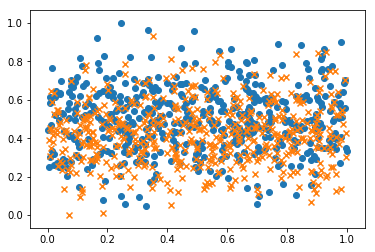

In [3]:
data_for_plot,label_for_plot = ut.for_the_plot_2D_origine_0(train_data,train_label,dimension)
ut.plot2DSet(data_for_plot,label_for_plot)

L'utilisation de reshape avec les bonnes valeurs (les images ont des tailles de 28x28) permet cependant une visualisation de ces données comme on peut le voir avec l'exemple ci-dessous :

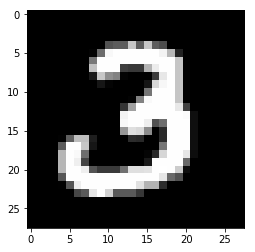

In [4]:
ut.afficheImage(train_data[1])

## Classifieur Linéaire : 

Une façon simple mais bancale d'essayer de classer les images seraient d'utiliser une approche linéaire. Dans ce cas de figure on crée un hyperplan (représenté dans le code par un vecteur aléatoire) qui sépare les exemples en deux catégories. 

In [5]:
# Date début du classifieur
debut_ClassifierLineaireRandom = time.time()

# Création d'un classifieur linéaire aléatoire de dimension 'dimension' (ici dans ce projet, dimension = 784)
un_classifieur = cl.ClassifierLineaireRandom(dimension)

# Par définition, ce classifieur n'a pas besoin d'entraînement
# (vide)

print("Classification du dataset avec ClassifierLineaireRandom :")
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification
# ENLEVER LES '#' des 6 prochaines lignes pour avoir l'affichage de l'évolution du taux de bonne classification

#nb_correct = 0
#for i in range(nb_exemple):
#    predi_i = un_classifieur.predict(test_data[i])
#    if predi_i == test_label[i]:
#        nb_correct += 1
#    print("\t origine : %2s --> predict : %2s  | taux : %.2f" %(test_label[i],predi_i,((nb_correct/(i+1))*100))+'%')

###############################################################################################################
    
# Affichage du taux de bonne classification    
accuracy_ClassifierLineaireRandom = un_classifieur.accuracy(test_data,test_label)
print("Taux de bonne classification sur le dataset: ", accuracy_ClassifierLineaireRandom)
fin_ClassifierLineaireRandom = time.time() - debut_ClassifierLineaireRandom
print("Temps d'éxécution pour le ClassifierLineaireRandom : %.3f secondes" % fin_ClassifierLineaireRandom)

Classification du dataset avec ClassifierLineaireRandom :
Taux de bonne classification sur le dataset:  0.499
Temps d'éxécution pour le ClassifierLineaireRandom : 0.334 secondes


A l'issue de l'expérimentation, on obtient un taux de bonne classification d'environ 50%. Ce dernier est mauvais mais a été trouvé en un faible temps de calcul. Il est donc logique de s'intéresser à une approche plus précise pour espérer avoir deux catégories cohérentes.

## Classiffieur K plus proche voisin (KNN) :

   Pour palier le problème de précision abordé précédemment, le KNN s'annonce redoutable. La distance choisie pour déterminer les voisins les plus proches est ici la distance eucludienne (ou norme) qui permet naturellement de calculer la distance entre 2 points à n dimensions. On compare donc les labels des k voisins les plus proches pour obtenir une meilleure classification.

In [6]:
# Date début du classifieur
debut_ClassifierKNN = time.time()

# NOMBRE VOISIN
nb_voisin = 3

# Création d'un classifieur KNN de dimension 'dimension' (ici dans ce projet, dimension = 784) et de nb_voisin
un_classifieur = cl.ClassifierKNN(dimension,nb_voisin)

# APPRENTISSAGE
un_classifieur.train(train_data,train_label)

print("Classification du dataset avec ClassifierKNN :")
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
############################## LE TEMPS D'EXECUTION DU CLASSIFIEUR EST TRES LONG ##############################
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification
# ENLEVER LES '#' des 6 prochaines lignes pour avoir l'affichage de l'évolution du taux de bonne classification

#nb_correct = 0
#for i in range(nb_exemple):
#    predi_i = un_classifieur.predict(test_data[i])
#    if predi_i == test_label[i]:
#        nb_correct += 1
#    print("\t origine : %2s --> predict : %2s  | taux : %.2f" %(test_label[i],predi_i,((nb_correct/(i+1))*100))+'%')

###############################################################################################################

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(test_data,test_label))
fin_ClassifierKNN = time.time() - debut_ClassifierKNN
print("Temps d'éxécution pour le ClassifierKNN : %.3f secondes" % fin_ClassifierKNN)

Classification du dataset avec ClassifierKNN :
Taux de bonne classification sur le dataset:  0.938
Temps d'éxécution pour le ClassifierKNN : 591.153 secondes


Comme espéré le classifieur KNN corrige la mauvaise précision (ici, une précision d'environ 94% pour 3 voisins) que nous avions eue avec un simple classifieur linéaire. Cependant bien que beaucoup plus précis, le temps de calcul est bien important. L'idéal à ce stade serait de potentiellement pouvoir trouver un classifieur avec un temps de calcul supportable et une précision suffisante (supérieure à 50%).

## Classiffieur Perceptron :

Bien que le classifieur KNN nous ait permis de résoudre le problème du taux de bonne classification, son utilisation deumeure trop longue. 
Cela nous a conduit à nous intéresser au classifeur Perceptron. Le principe du Perceptron est simple. A chaque attribut (pixels dans notre exemple), on associe un coefficient qui est réévalué (avec le taux d'apprentissage) à chaque échec lors de la prédiction. Cette prédiction est alors répétée n fois (n est un nombre d'itération choisi arbitrairement) afin de trouver les meilleurs coefficients possibles puis; dans un second temps, le taux de bonne classification.

In [7]:
# Date début du classifieur
debut_ClassifierPerceptron = time.time()

# taux d'apprentissage (learning) et nombre d'itération
learning = 0.01
nb_iteration = 100

# Création d'un classifieur Perceptron de dimension 'dimension' (ici dans ce projet, dimension = 784) 
# et du taux d'apprentissage
un_classifieur = cl.ClassifierPerceptron(dimension,learning)

# APPRENTISSAGE
un_classifieur.train(train_data,train_label,nb_iteration)

print("Classification du dataset avec ClassifierPerceptron :")
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification
# ENLEVER LES '#' des 6 prochaines lignes pour avoir l'affichage de l'évolution du taux de bonne classification

#nb_correct = 0
#for i in range(nb_exemple):
#    predi_i = un_classifieur.predict(test_data[i])
#    if predi_i == test_label[i]:
#        nb_correct += 1
#    print("\t origine : %2s --> predict : %2s  | taux : %.2f" %(test_label[i],predi_i,((nb_correct/(i+1))*100))+'%')

###############################################################################################################

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(test_data,test_label))
fin_ClassifierPerceptron = time.time() - debut_ClassifierPerceptron
print("Temps d'éxécution pour le ClassifierPerceptron : %.3f secondes" % fin_ClassifierPerceptron)

Classification du dataset avec ClassifierPerceptron :
Taux de bonne classification sur le dataset:  0.866
Temps d'éxécution pour le ClassifierPerceptron : 14.400 secondes


Le classfieur Perceptron répond donc aux deux critères que nous nous étions fixés, à savoir: un temps d'éxécution correct (ici, environ 15 secondes avec un nombre d'itérations = 100) et un taux de bonne classification satisfaisant (ici, une précision d'environ 87% avec un taux d'apprentissage = 0.01).
Ainsi dans ce cas de figure restreint (à 2 labels), le classifieur le plus approprié pour répondre au problème de la reconnaissance de l'écriture manuscrite est le Perceptron.

## Pour aller plus loin  :

### Classiffieur PerceptronKernel :

Un autre classifieur qu'il a été judicieux d'étudier était le Kernel (ou Perceptron Kernel). 
Reposant globalement sur le même algorithme que le Perceptron, à l'exception ici que, plutôt que de n'étudier que les attributs individuellement, les combinaisons d'attributs sont également prises en compte pour voir si elles apportent des informations pertinantes conduisant de fait à une forte augmentation du temps de calcul. 
Sa lenteur (plusieurs heures pour un faible paramétrage), comme on peut le voir ci-dessous, nous a conduit à limiter les tests et ne le prendre en exemple que pour sa forte précision.

In [8]:
# Date début du classifieur
debut_ClassifierPerceptronKernel = time.time()

# taux d'apprentissage (learning) et nombre d'itération et kernel
learning = 0.01
nb_iteration = 10
kernel = ut.KernelPoly()

# Création d'un classifieur Perceptron de dimension 'dimension' (ici dans ce projet, dimension = 784) 
# et du taux d'apprentissage
un_classifieur = cl.ClassifierPerceptronKernel(learning,kernel,dimension)

# APPRENTISSAGE
un_classifieur.train(train_data,train_label,nb_iteration)

print("Classification du dataset avec ClassifierPerceptron :")
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
############################## LE TEMPS D'EXECUTION DU CLASSIFIEUR EST TRES LONG ##############################
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###############################################################################################################
# Classification du dataset (contrôle de predict et score) et affichage de l'évolution du taux de 
# bonne classification
# ENLEVER LES '#' des 6 prochaines lignes pour avoir l'affichage de l'évolution du taux de bonne classification

#nb_correct = 0
#for i in range(nb_exemple):
#    predi_i = un_classifieur.predict(test_data[i])
#    if predi_i == test_label[i]:
#        nb_correct += 1
#    print("\t origine : %2s --> predict : %2s  | taux : %.2f" %(test_label[i],predi_i,((nb_correct/(i+1))*100))+'%')

###############################################################################################################

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(test_data,test_label))
fin_ClassifierPerceptronKernel = time.time() - debut_ClassifierPerceptronKernel
print("Temps d'éxécution pour le ClassifierPerceptron : %.3f secondes" % fin_ClassifierPerceptronKernel)

Classification du dataset avec ClassifierPerceptron :
Taux de bonne classification sur le dataset:  0.946
Temps d'éxécution pour le ClassifierPerceptron : 2426.348 secondes


# Evaluation :

Pour appuyer nos recherches , nous avons fait une série de tests avec différents paramétrages sur les différents classifieurs : les fichiers résultats joints dans le dossier contienent les labels attribués aux donnés apres apprentissage. 

## resultats-1.csv (Perceptron : learning = 0.01 et nb_iteration = 100)

In [9]:
learning = 0.01
nb_iteration = 100
un_classifieur = cl.ClassifierPerceptron(dimension,learning)
un_classifieur.train(train_data,train_label,nb_iteration)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-1.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-2.csv (Perceptron : learning = 0.001 et nb_iteration = 1000)

In [10]:
learning = 0.001
nb_iteration = 1000
un_classifieur = cl.ClassifierPerceptron(dimension,learning)
un_classifieur.train(train_data,train_label,nb_iteration)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-2.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-3.csv (KNN : nb_voisin = 5)

In [11]:
nb_voisin = 5
un_classifieur = cl.ClassifierKNN(dimension,nb_voisin)
un_classifieur.train(train_data,train_label)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-3.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-4.csv (KNN : nb_voisin = 17)

In [12]:
nb_voisin = 17
un_classifieur = cl.ClassifierKNN(dimension,nb_voisin)
un_classifieur.train(train_data,train_label)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-4.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()

## resultats-5.csv (PerceptronKernel : learning = 0.01 et nb_iteration = 10)

In [13]:
learning = 0.01
nb_iteration = 10
un_classifieur = cl.ClassifierPerceptronKernel(learning,kernel,dimension)
un_classifieur.train(train_data,train_label,nb_iteration)
ident = eval_.iloc[:,0].values
eval_label = np.array([(un_classifieur.predict(i)) for i in eval_data])
resultat = open("fichier_csv/resultat-5.csv", "w")
for (ide,predict_label) in zip(ident,eval_label):
    resultat.write(str(ide)+";"+str(predict_label)+"\n")
resultat.close()